<h1 style="color:red;">Machine Learning Final Assignment</h1>
<h2 style="color:lightblue;">Nidal Khaled Abdel Hameed Shahin</h2>
<li>ID: 162278</li>
<li>Model used: Random Forest</li>

# Importing necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.inspection import PartialDependenceDisplay

# Loading the training datafile

In [3]:
train_df = pd.read_csv("/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_train.csv")

# Features(excluding ID and spam columns)
# The Target Label (spam)

In [4]:
features = train_df.drop(columns=["ID","spam"])
labels = train_df["spam"]

# another way to assign values to the ((features)) variable could be by using the unique random forest function
# ( feature_importances_ ) that calcuate the relative importance of each feauture and then assign
# the best and most relevant n-features instead of using all of them.

# However, I did NOT use it because it lowers the bias (a bit of an overfit) thus it lowers my f1-score (o>o)

# Splitting data into 2 sets for training and scores validating

In [5]:
F_train,F_test,L_train,L_test = train_test_split(features,labels,test_size=0.1,train_size=0.9,random_state=42)
# These values where chosen after a LOT of tests since they result in the best scores. 

# I do NOT have to include a train_size value if I provide test_size value and vice versa
# since the compiler automatically assign a (1 - provided value) to the missing one
# because their sum must be <= 1 based on my research.

# Creating My Random Forest Model

In [6]:
RFmodel = RandomForestClassifier(n_estimators=200, max_features="log2", random_state=42)
# These were also the best values after a LOT^2 of tests beacause it has a lot of parameters
# other parameters gave me better scores when they were set to their default values.

# Training and Validating

In [7]:
RFmodel.fit(F_train, L_train) # training

pred_label = RFmodel.predict(F_test) # Predicting labels then Validating in all metrics
acc = accuracy_score(L_test, pred_label)
prec = precision_score(L_test, pred_label)
rec = recall_score(L_test, pred_label)
F1 = f1_score(L_test, pred_label)

print("1)Accuracy :",acc)
print("2)precision:",prec)
print("3)Recall   :",rec)
print("4)f1-score :",F1)
# handmade formatting is the best formatting

1)Accuracy : 0.9720496894409938
2)precision: 0.9844961240310077
3)Recall   : 0.9477611940298507
4)f1-score : 0.9657794676806083


# Confusion Matrix visualization

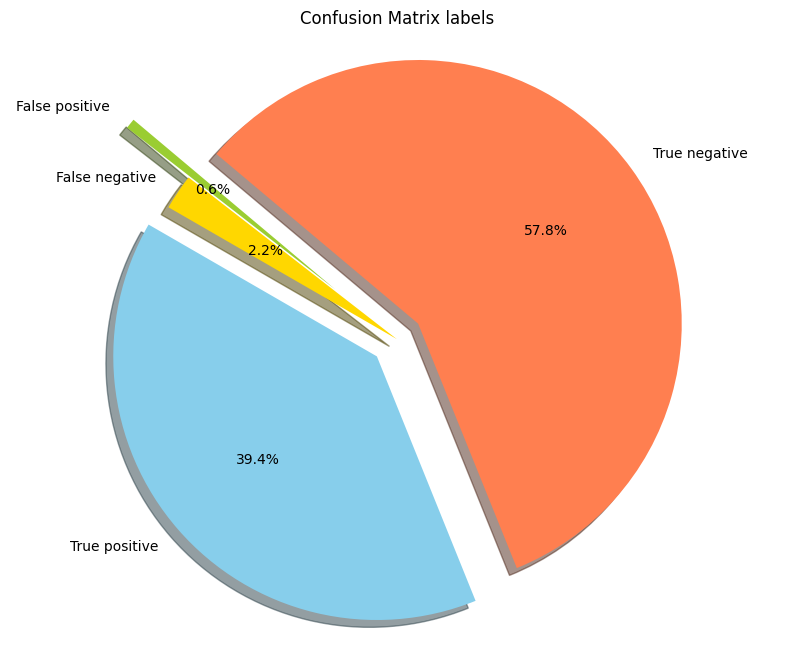

In [8]:
CM = confusion_matrix(L_test, pred_label)
tn,fp,fn,tp = CM.ravel()

CM_labels = ["True positive","True negative","False positive","False negative"]
sizes=[tp,tn,fp,fn]
colors = ["skyblue","coral","yellowgreen","gold"] # best I've found for a good contrast
explode = (0.1,0.1,0.3,0) # to make small percentages more pronounced and visible

plt.figure(figsize=(10,8))
plt.pie(sizes,explode=explode,labels=CM_labels,colors=colors,autopct="%1.1f%%",startangle=150,shadow=True)
plt.axis("equal") # to ensure the circle shape of the pie
plt.title("Confusion Matrix labels")
plt.show()

# Features Importance: analysis and visualization

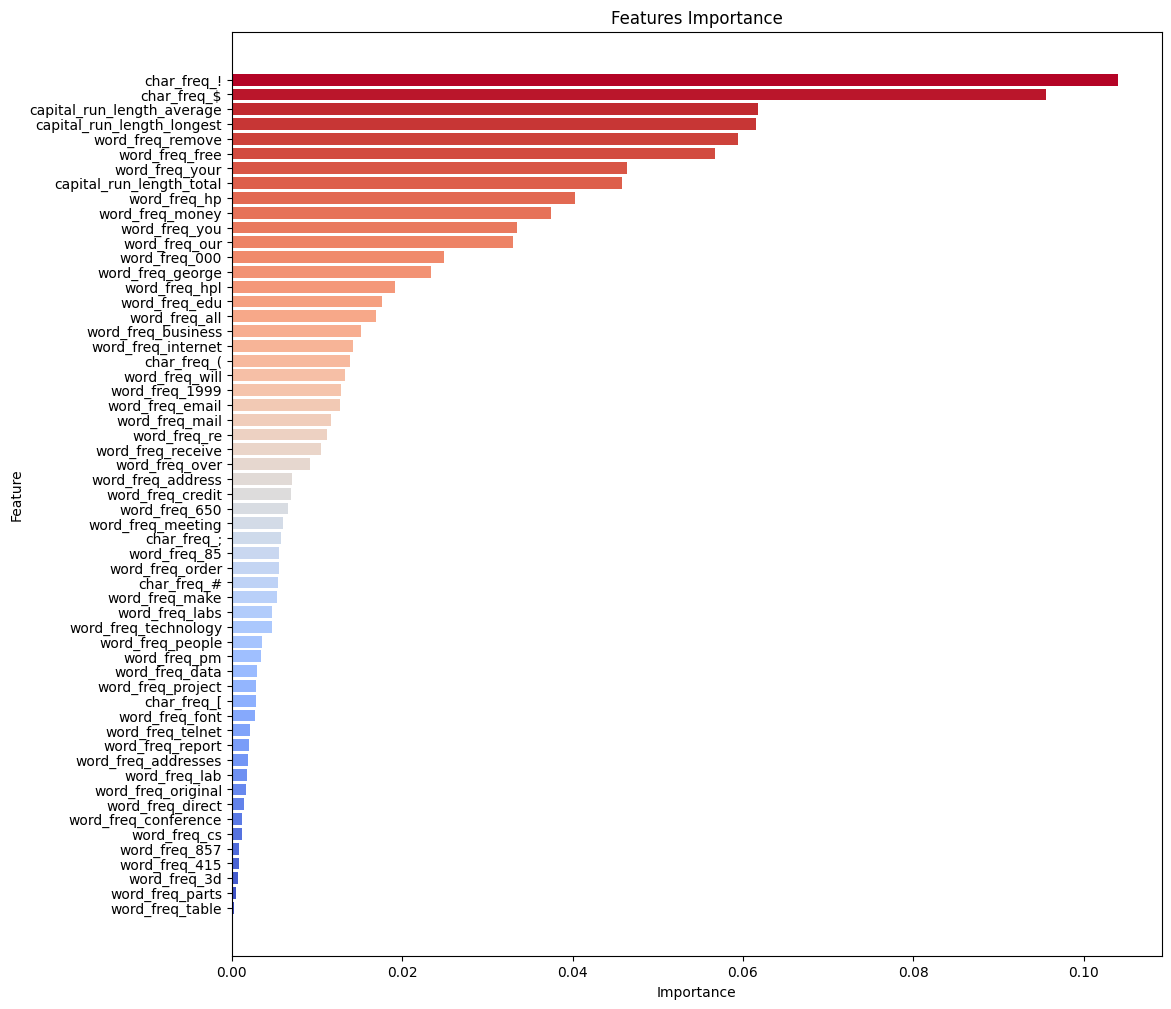

In [11]:
importance = RFmodel.feature_importances_
features_names = features.columns

importance_df = pd.DataFrame({"Feature":features_names,"Importance":importance})
importance_df = importance_df.sort_values(by="Importance",ascending= False)
importance_df.to_csv("features_importance.csv",index =False)

plt.figure(figsize=(12,12))
gradientcolor = plt.cm.coolwarm(np.linspace(1,0,len(importance_df))) # for a COOLer look
plt.barh(importance_df["Feature"], importance_df["Importance"], color=gradientcolor)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Features Importance")
plt.gca().invert_yaxis() # most important on top, least in the bottom
plt.show()

# Partial Dependence Plots:
* I will apply this method on the top 3 and bottom 3 features on the importance_df
* this visualization shows how much a feature affect the spam predection
* increase in PDP for a feature = the more likely it will result in a spam (1) predection

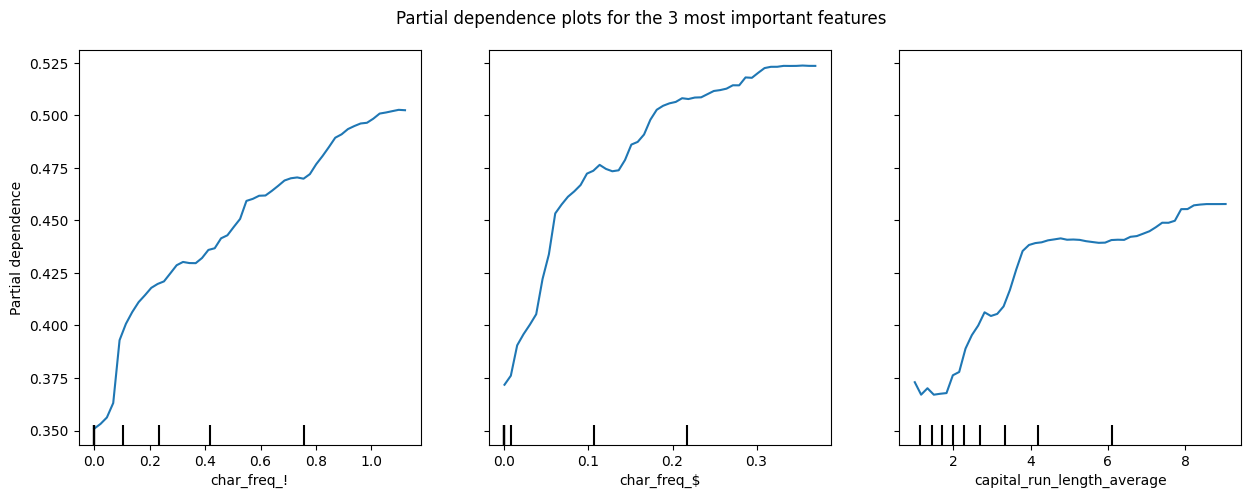

In [16]:
top_3 = importance_df['Feature'].head(3).tolist()
fig,ax = plt.subplots(figsize=(15,5))
PartialDependenceDisplay.from_estimator(RFmodel,features,top_3,ax=ax,grid_resolution=50)
plt.suptitle("Partial dependence plots for the 3 most important features")
plt.subplots_adjust(top=0.9)
plt.show()

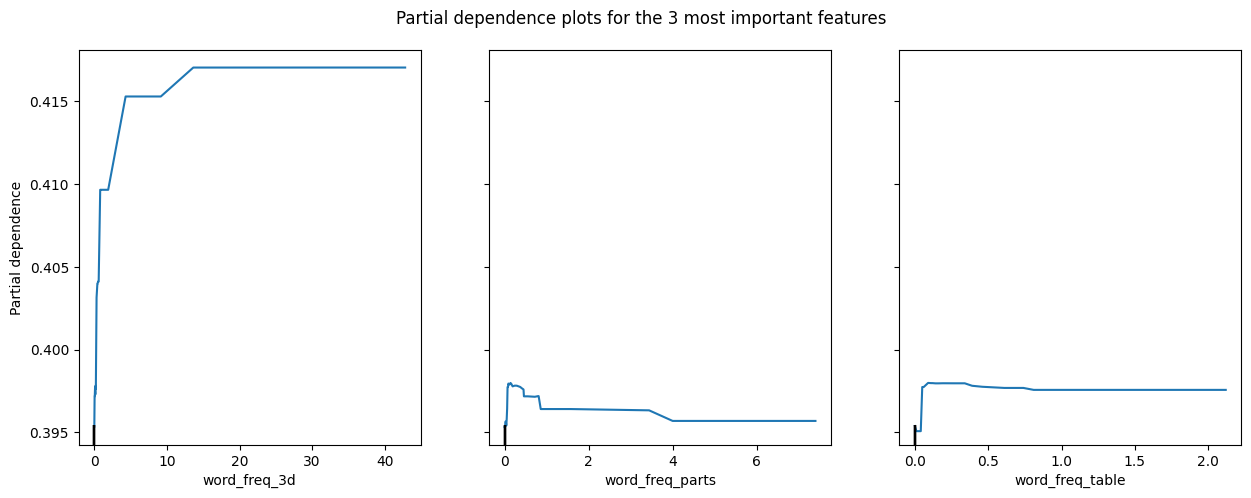

In [14]:
bottom_3 = importance_df['Feature'].tail(3).tolist()
fig,ax = plt.subplots(figsize=(15,5))
PartialDependenceDisplay.from_estimator(RFmodel,features,bottom_3,ax=ax,grid_resolution=50)
plt.suptitle("Partial dependence plots for the 3 most important features")
plt.subplots_adjust(top=0.9)
plt.show()

# Loading the test datafile

In [17]:
test_df = pd.read_csv("/kaggle/input/just-ai-249-machine-learning-lab-competition/spambase_test.csv")

# Test file features, IDs and labels prediction

In [18]:
test_features = test_df.drop(columns=["ID"])
IDs = test_df["ID"] # to use in the submission file

test_labels = RFmodel.predict(test_features)

# Creating the answers dataframe and saving it to a csv file

In [19]:
answers = pd.DataFrame({'ID': IDs, 'spam': test_labels})
answers.to_csv('Nidal_predections.csv', index=False)
answers

,ID,spam
0,1981,0
1,1940,0
2,4260,1
3,3200,1
4,3082,1
...,...,...
1376,2757,1
1377,1986,0
1378,2972,0
1379,3568,1


<h1 style="color:red;">Notes</h1>

* My humble knowledge of the random forest model that comes from the course slides and my research on the internet restricted me from writing a more complex and flexible code so I settled with this simple and straightforward code that I hope you liked.

* I considered trying preprocessing to further inhance my models performance and thought of standardization but it didn't really do any inhancement so I gave up on it.

* The same happened with the feature_importance_ function, I tried to change the way I define my features list with an n-number of features that has the most relevant columns instead of using all of the 59 columns(features), but it didn't do well score-wise so I just used it for analysis and visualization.

* Each and every single parameter value was assigned after multiple mixes of tests to ensure the best performance.
 
* Would have loved to add more of the data visualization techniques we studied in class but sadly we have a LOT of features aside from the task itself being a 2-class (0,1) classification and not a continuous range like regression tasks.

* Finally, a BIG thank you Dr.Malak and T.Ahmad for your efforts through out the semester.